# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

<BarContainer object of 2 artists>

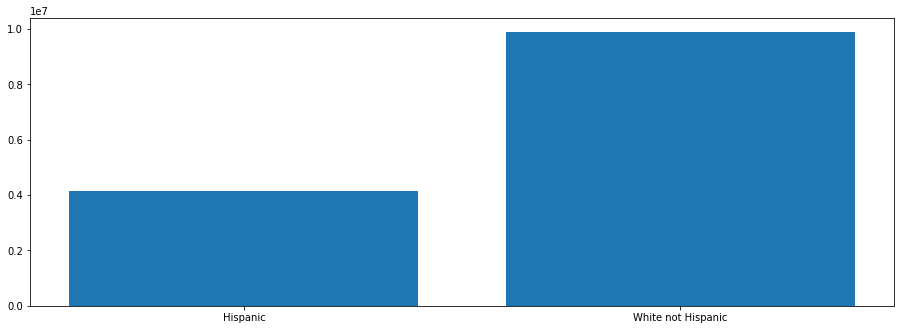

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('ca_dds_expenditures.csv')

hispanic_exp = df[df['Ethnicity']=="Hispanic"]['Expenditures'].sum()
nonhisp_exp = df[df['Ethnicity']=="White not Hispanic"]['Expenditures'].sum()

bar_plot = plt.figure()
ax = bar_plot.add_axes([0, 0, 2, 1])
x_axis = ['Hispanic', 'White not Hispanic']
y_axis = [hispanic_exp, nonhisp_exp]
ax.bar(x_axis, y_axis)


**We can see that more was spent on non-Hispanic residents.**

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

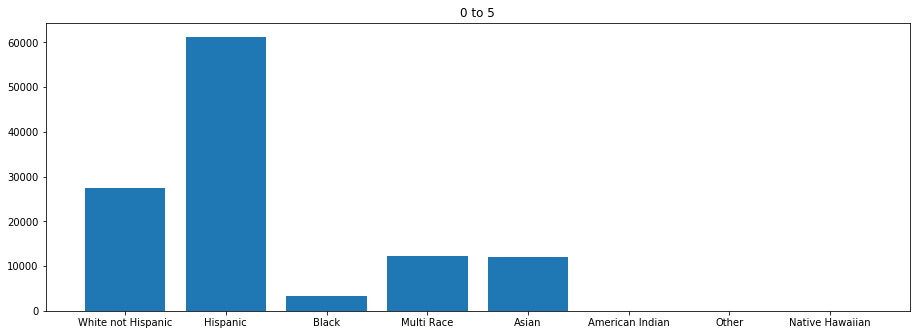

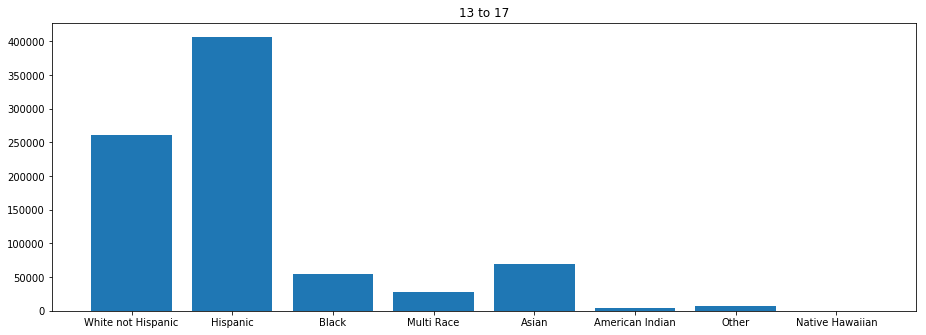

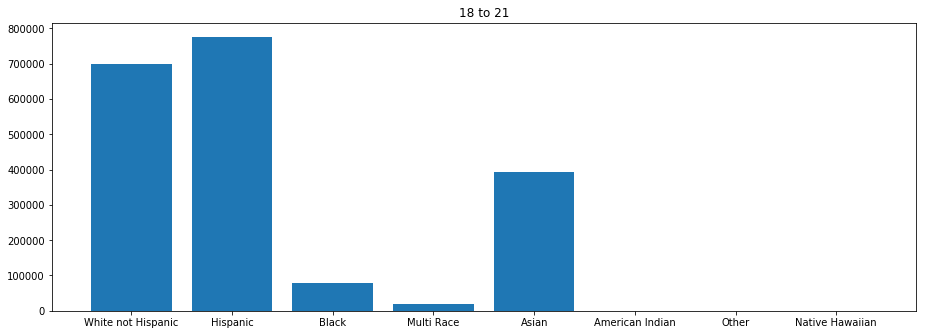

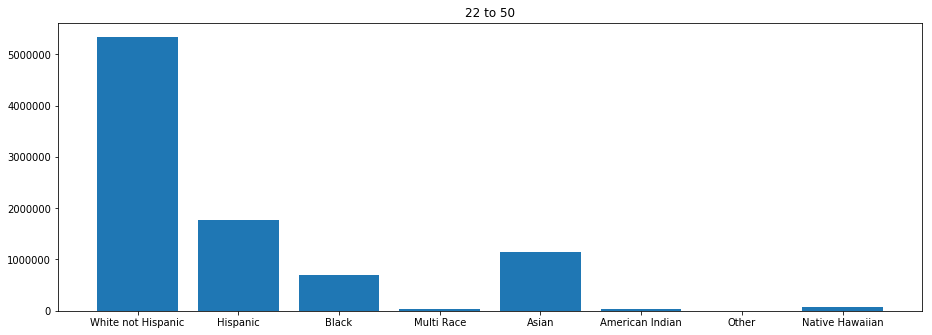

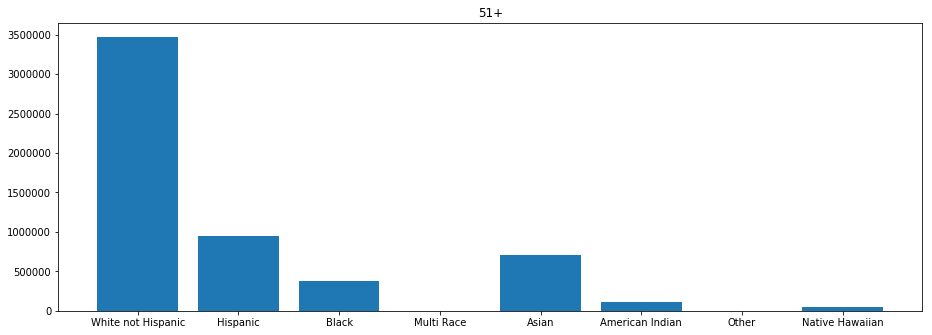

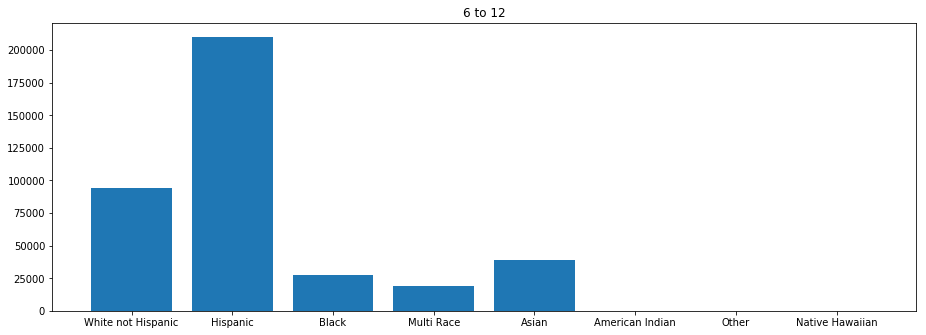

In [2]:
cohorts = df['Age Cohort'].unique()
cohorts.sort()
ethnic_groups = df['Ethnicity'].unique()

for cohort in cohorts:
    group_data = []
    for group in ethnic_groups:
        exp = df.loc[(df['Ethnicity']==group)&(df['Age Cohort']==cohort), 'Expenditures'].sum()
        group_data.append(exp)
       
    bar_plot = plt.figure()
    ax = bar_plot.add_axes([0, 0, 2, 1])
    ax.set_title(cohort)
    x_axis = ethnic_groups
    y_axis = group_data
    ax.bar(x_axis, y_axis)

**After breaking up the data into cohorts, you can see that in several cases more was spent on Hispanic residents than non-Hispanic residents. From ages 0-21, more is spent on Hispanic residents. From 22-51+, more is spent on white residents.**

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

In [3]:
hisp_ages = df.loc[(df['Ethnicity']=="Hispanic")]['Age'].value_counts().index.tolist()
hisp_ages_count = df.loc[(df['Ethnicity']=="Hispanic")]['Age'].value_counts().tolist()
print len(hisp_ages)
print len(hisp_ages_count)
hisp_dist = plt.figure()
ax_hisp = bar_plot.add_axes([0, 0, 2, 1])
x_axis_hisp = hisp_ages
y_axis_hisp = hisp_ages_count
ax_hisp.bar(x_axis, y_axis)
#hisp_dist.show()

#white_ages = df.loc[(df['Ethnicity']=="White not Hispanic")]['Age'].unique()



#hispanic_exp = df[df['Ethnicity']=="Hispanic"]['Expenditures'].sum()
#exp = df.loc[(df['Ethnicity']=="Hispanic")]['Age']



54
54


/home/deven/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<BarContainer object of 8 artists>

<Figure size 432x288 with 0 Axes>

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows: Upload notebook (ipynb) iLearn.